In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("./data/titanic.csv")

1- El titanic fue un accidente con una tasa de mortalidad alta.

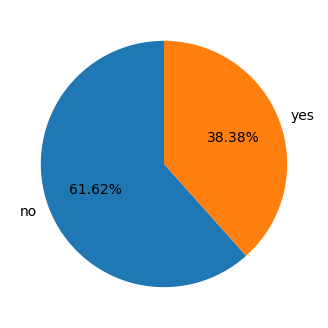

In [4]:
#Lo puedo hacer con un diagrama de tarta porque es mucho más visual y menos complicado de entender
data = df_titanic["alive"].value_counts()

fig,ax = plt.subplots(1,1,figsize = (4,4))

ax.pie(data.values,
        labels=data.index,
        autopct='%.2f%%', startangle= 90);

Ciertamente, más del 60% de los pasajeros murieron. El análisis de datos apoya la afirmación.

En esa ocasión los datos apoyan que se dio el "Las mujeres y los niños primero".

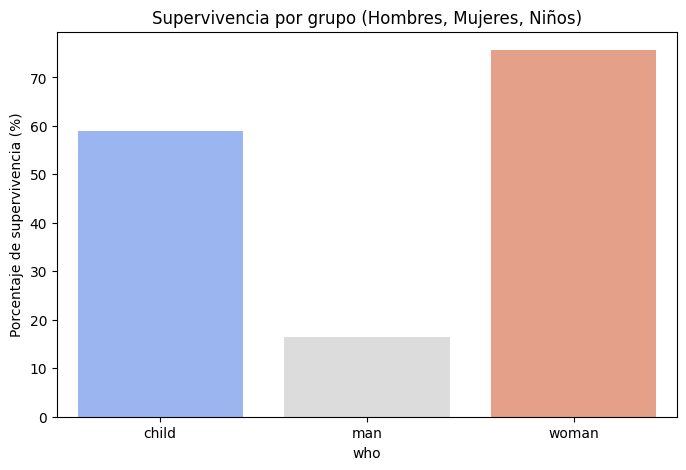

In [5]:
# Calcular tasas de supervivencia por grupo (según la columna "who")
supervivencia_por_grupo = df_titanic.groupby("who")["survived"].mean() * 100

# Visualización del gráfico
plt.figure(figsize=(8, 5))
sns.barplot(x=supervivencia_por_grupo.index, y=supervivencia_por_grupo.values, hue=supervivencia_por_grupo.index, palette="coolwarm", legend=False)

plt.ylabel("Porcentaje de supervivencia (%)")
plt.title("Supervivencia por grupo (Hombres, Mujeres, Niños)")
plt.show()

Efectivamente, las mujeres y los niños sobrevivieron sustancialmente más que los hombres.

que la clase en la que se viajes tuvo una influencia significativa:

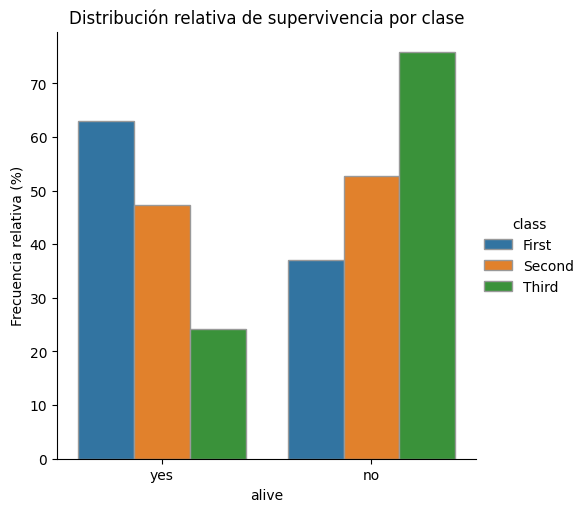

In [7]:
df_frecuencia_relativa = df_titanic.groupby("class")["alive"].value_counts(normalize=True).reset_index()
df_frecuencia_relativa.rename(columns={"proportion": "frecuencia_relativa"}, inplace=True)

#convertir a porcentaje
df_frecuencia_relativa["frecuencia_relativa"] = df_frecuencia_relativa.groupby("class")["frecuencia_relativa"].transform(lambda x: (x/x.sum())*100)
sns.catplot(x="alive", y="frecuencia_relativa", hue="class", kind="bar", edgecolor=".6", orient="v", data=df_frecuencia_relativa)


plt.ylabel("Frecuencia relativa (%)")
plt.title("Distribución relativa de supervivencia por clase")
plt.show()

Así se ve bien que la supervivencia fue mucho más acusada en la gente de primera clase y que la gente de tercera murió más, independientemente del sexo o la edad.

las diferencias de tasas de supervivencia entre mujeres y niños.

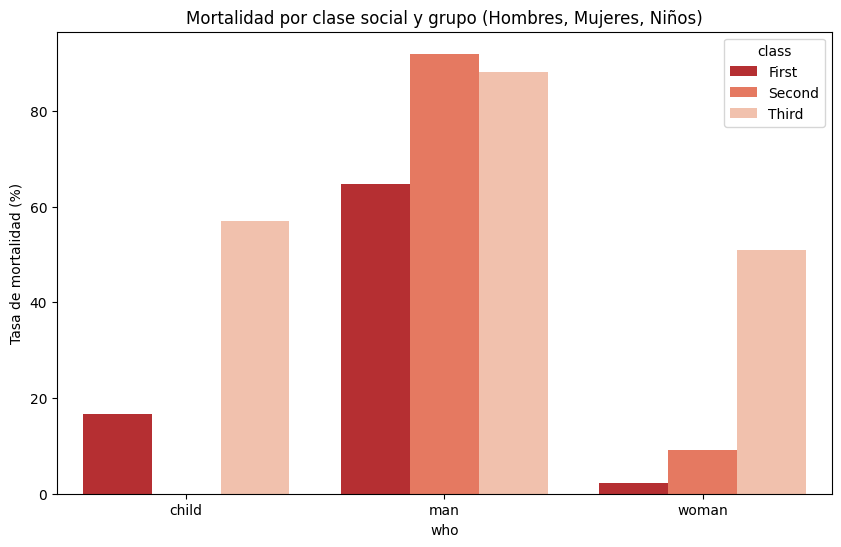

In [8]:
# Calcular tasas de mortalidad (1 - tasa de supervivencia)
mortalidad_por_grupo_clase = df_titanic.groupby(["who", "class"])["survived"].mean()
mortalidad_por_grupo_clase = (1 - mortalidad_por_grupo_clase) * 100  # Convertir a porcentaje
mortalidad_por_grupo_clase = mortalidad_por_grupo_clase.reset_index()

# Gráfico de barras de mortalidad
plt.figure(figsize=(10, 6))
sns.barplot(x="who", y="survived", hue="class", data=mortalidad_por_grupo_clase, palette="Reds_r")

plt.ylabel("Tasa de mortalidad (%)")
plt.title("Mortalidad por clase social y grupo (Hombres, Mujeres, Niños)")
plt.show()

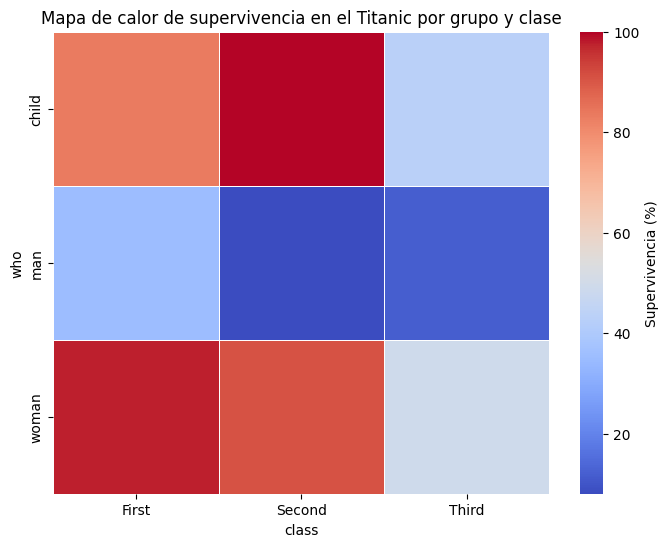

In [9]:
#Diagrama de mosaico conjunto:

# Crear tabla de supervivencia (convertida a porcentaje)
tabla_supervivencia = df_titanic.pivot_table(index="who", columns="class", values="survived", aggfunc="mean") * 100

# Graficar mapa de calor SIN números dentro
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_supervivencia, cmap="coolwarm", annot=False, linewidths=0.5, cbar_kws={"label": "Supervivencia (%)"})

plt.title("Mapa de calor de supervivencia en el Titanic por grupo y clase")
plt.show()

En el mapa de calor se ve muy fácilmente que los niños de segunda clase sobrevivieron al 100%, concuerda con el gráfico que decía que la mortalidad de niños en segunda clase era de 0.
Por otro lado, las mujeres de primera clase también alcanzaron altas tasas de supervivencia.

En una superviviencia media-alta se encuetnran el segmento de los niños de primera  clase y las mujeres de segunda clase. 
Los hombres de cualquier clase, especialmente de segunda y tercera clase y todas las personas de tercera clase ostentan tasas de supervivencia bajas o muy bajas.

5- Además aunque el puerto de embarque parece influir, se podría asumir que lo fue el tipo de pasaje que embarcó en cada uno.

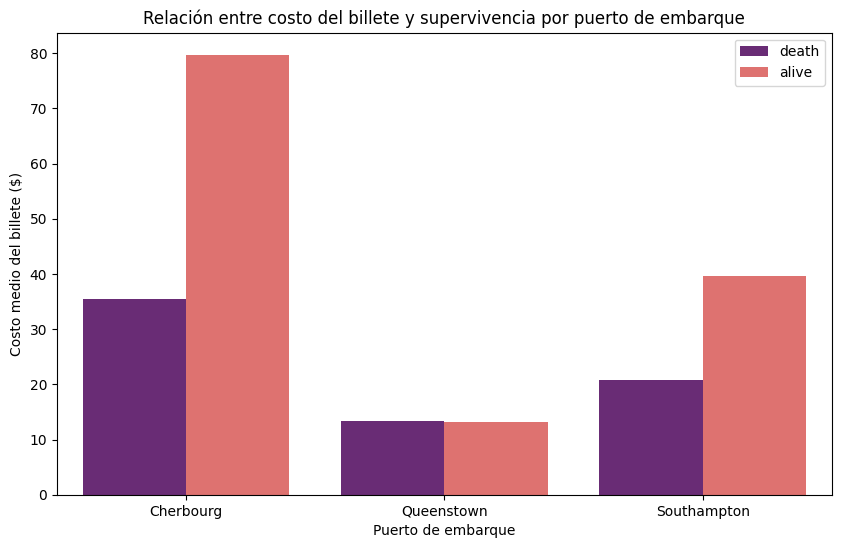

In [11]:
# Agrupar el costo del billete por puerto y estado de supervivencia
fare_por_embarque = df_titanic.groupby(["embark_town", "survived"])["fare"].mean().reset_index()

# Reemplazar valores en "Survived" para que la leyenda muestre "death" y "alive"
fare_por_embarque["survived"] = fare_por_embarque["survived"].map({0: "death", 1: "alive"})

# Graficar barras agrupadas
plt.figure(figsize=(10, 6))
ax = sns.barplot(x="embark_town", y="fare", hue="survived", data=fare_por_embarque, palette="magma")

plt.ylabel("Costo medio del billete ($)")
plt.xlabel("Puerto de embarque")
plt.title("Relación entre costo del billete y supervivencia por puerto de embarque")

# Quitar el título de la leyenda para que solo aparezcan "death" y "alive"
ax.legend(title="")

plt.show()

El coste del billete parece ser influencia. Los pasajeros que pagaron menos de 30 libras fallecieron en su gran mientras que los que pagaron más de 40, la mitad aproximadamente que embarcó en Cerbourg sobrevivió y una cierta parate de los que embarcaron en Southhampton.